Creating a jupyter notebook file to run the data processing/feature engineering commands

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [73]:
product_catalog_df = pd.read_csv("C:\\data\\Work\\Dataset\\product_catalog_new.csv")

In [74]:
product_catalog_df

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Medium,Durable,Member,2530.23,Debit Card,Yes,217,15.11,171.65,4,Positive
1,2,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Foldable,Normal,1784.65,Debit Card,Yes,698,9.15,143.67,3,Positive
2,3,Rustic Bookshelf,Storage & Organization,Wood,Large,Durable,Member,1325.18,Credit Card,Yes,973,15.78,32.06,4,Neutral
3,4,Rattan Armchair,Sofas & Seating,Velvet,Medium,Durable,Member,1789.55,Cash on Delivery,No,201,6.42,171.89,3,Negative
4,5,Glass Dining Table,Tables,Glass,Large,Durable,Normal,1915.92,Debit Card,No,932,16.26,118.37,7,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Large,Ergonomic,Member,2129.87,Credit Card,Yes,219,19.09,131.49,10,Neutral
96,97,Garden Lounge Bench,Outdoor Furniture,Wood,Medium,Waterproof,Member,3011.10,Credit Card,Yes,806,7.79,144.57,10,Positive
97,98,Queen Bed with Storage,Bedroom Furniture,Wood,Medium,Minimalist,Member,999.36,Credit Card,No,71,17.95,149.06,8,Positive
98,99,Compact Shoe Rack,Storage & Organization,Plastic,Small,Durable,Normal,3186.13,Cash on Delivery,Yes,749,2.73,116.02,5,Positive


In [75]:
#Checking the column names 
column_list=(list(product_catalog_df.columns)) 
print(column_list) 

 

['Product ID', 'Product Name', 'Category', 'Material', 'Size', 'Special_features', 'Customer Type', 'Price', 'Payment Type', 'Sellable Online', 'Sales Volume', 'Return Rate', 'Storage Cost', 'Seasonality Score', 'Implicit Feedback']


In [76]:
#Checking the number of products in the dataset 
print(product_catalog_df["Product Name"].nunique()) 

30


In [77]:
#Checking missing values 
print(product_catalog_df.isnull().sum()) 

Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [78]:
#Checking for duplicates 

print("Product Catalog Duplicates:", product_catalog_df.duplicated().sum()) 

Product Catalog Duplicates: 0


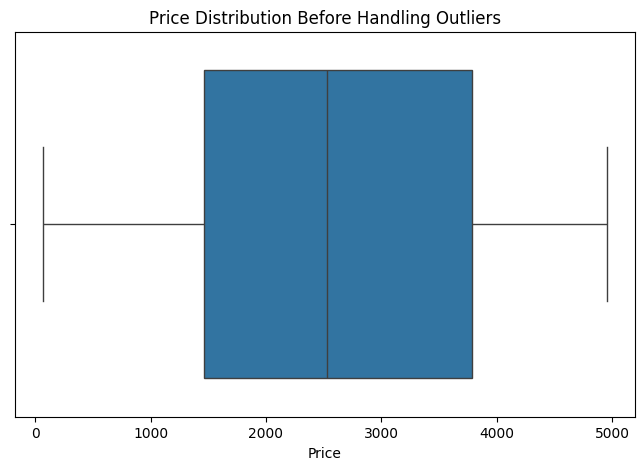

In [79]:
#Checking outliers 
plt.figure(figsize=(8,5)) 
sns.boxplot(x=product_catalog_df["Price"]) 
plt.title("Price Distribution Before Handling Outliers") 
plt.show() 

In [ ]:
#Standardizing categorical data 

categorical_cols = [ "Payment Type"] 
for col in categorical_cols: 
     if col in product_catalog_df.columns: 
         product_catalog_df[col] = product_catalog_df[col].str.lower().str.strip() 

In [81]:
#map sellable online to 0 and 1 

if "Sellable Online" in product_catalog_df.columns: 
    product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"Yes": 1, "No": 0}).astype(int) 

 

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_29528\3774625715.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"Yes": 1, "No": 0}).astype(int)


In [82]:
# Scaling only selected numerical columns 
scaled_cols = ["Price", "Return Rate", "Storage Cost"] 

if "Seasonality Score" in product_catalog_df.columns:  # Checking if it exists 
    scaled_cols.append("Seasonality Score") 

In [83]:

 #Convert data types 
convert_types = { 

    "Price": float, 

    "Sales Volume": int,  

    "Return Rate": float, 

    "Storage Cost": float 

} 

for col, dtype in convert_types.items(): 

    if col in product_catalog_df.columns: 

        product_catalog_df[col] = pd.to_numeric(product_catalog_df[col], errors='coerce').astype(dtype) 

 

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_29528\3655403850.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)


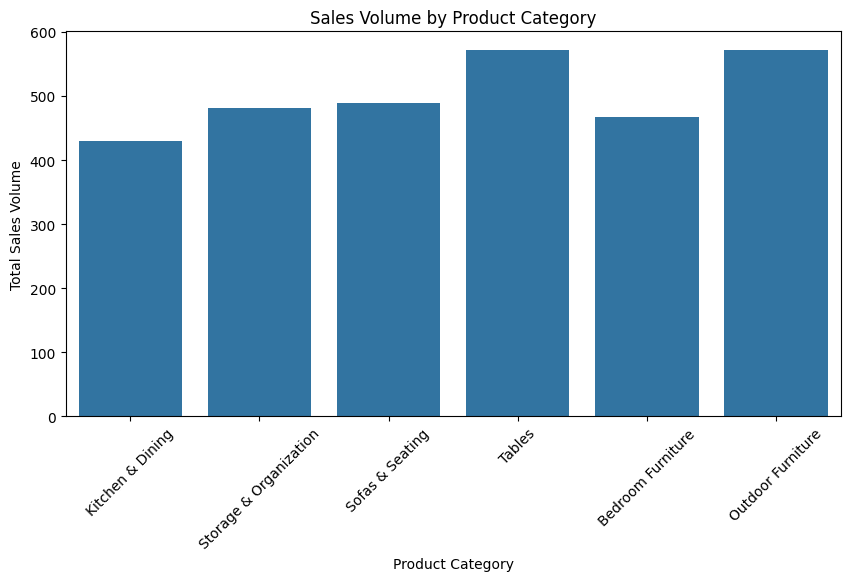

In [84]:
#Bar plot for products vs sales 

plt.figure(figsize=(10,5)) 
sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None) 
plt.xticks(rotation=45) 
plt.title("Sales Volume by Product Category") 
plt.xlabel("Product Category") 
plt.ylabel("Total Sales Volume") 
plt.show() 

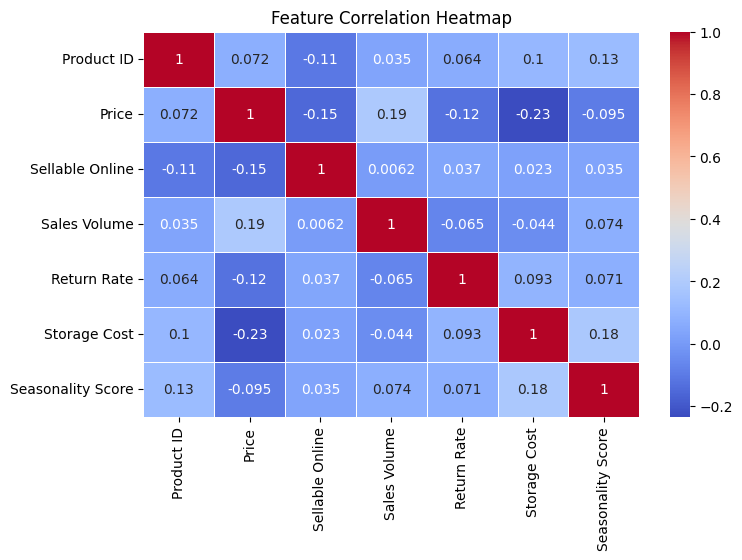

In [85]:
# Select only numerical columns for correlation 

numeric_data = product_catalog_df.select_dtypes(include=["number"]) 

# Generate heatmap 

plt.figure(figsize=(8,5)) 
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5) 
plt.title("Feature Correlation Heatmap") 
plt.show() 

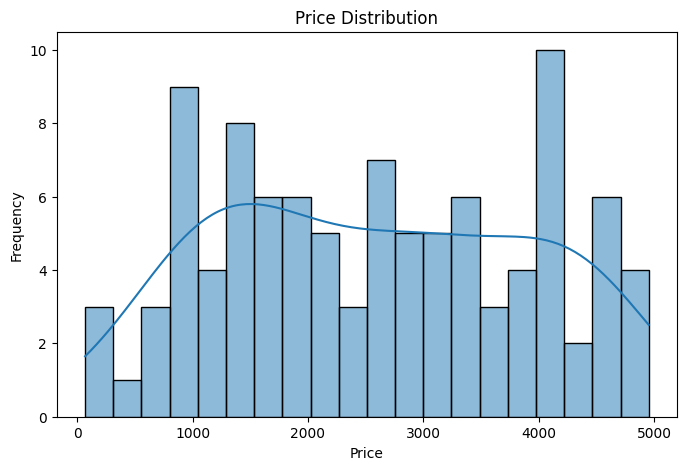

In [86]:
#return rate 

plt.figure(figsize=(8,5)) 
sns.histplot(product_catalog_df["Price"], bins=20, kde=True) 
plt.title("Price Distribution") 
plt.xlabel("Price") 
plt.ylabel("Frequency") 
plt.show() 

Text(0, 0.5, '')

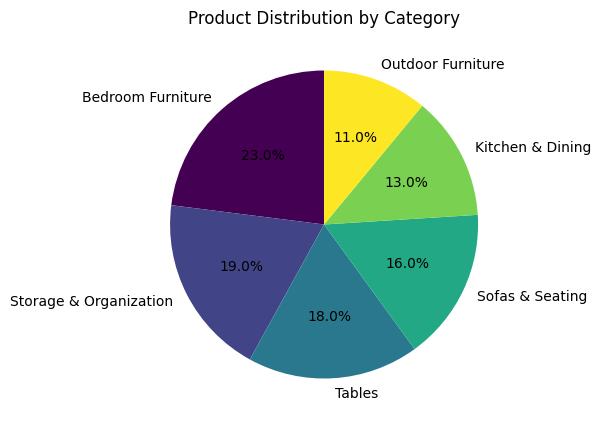

In [50]:
#product distribution 

plt.figure(figsize=(8,5)) 
product_catalog_df["Category"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis") 
plt.title("Product Distribution by Category") 
plt.ylabel("")  

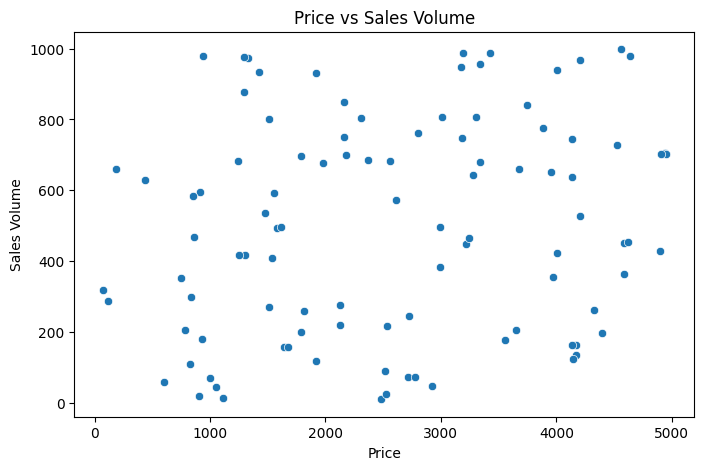

In [51]:
#scatter plot 

plt.figure(figsize=(8,5)) 
sns.scatterplot(x=product_catalog_df["Price"], y=product_catalog_df["Sales Volume"]) 
plt.title("Price vs Sales Volume") 
plt.xlabel("Price") 
plt.ylabel("Sales Volume") 
plt.show() 

Feature Engineering

In [52]:
# Creating Sales_to_Return_Ratio 
product_catalog_df["Sales_to_Return_Ratio"] = product_catalog_df["Sales Volume"] / (product_catalog_df["Return Rate"] + 1)   

 

In [53]:
# Creating Revenue per product 
product_catalog_df["Revenue_Per_Product"] = product_catalog_df["Sales Volume"] * product_catalog_df["Price"] 

 

In [54]:
#calculating the online sellability score 
product_catalog_df["Online_Sellability_Score"] = product_catalog_df["Sellable Online"] * product_catalog_df["Sales Volume"] / (product_catalog_df["Sales Volume"].max() + 1) 

 

In [55]:
 # Creating Storage Efficiency Score 
product_catalog_df["Storage_Efficiency_Score"] = product_catalog_df["Revenue_Per_Product"] / (product_catalog_df["Storage Cost"] + 1) 


In [56]:

# High Demand Indicator (Top 25% best-selling products) 
threshold_sales = product_catalog_df["Sales Volume"].quantile(0.75) 
product_catalog_df["High_Demand_Indicator"] = np.where(product_catalog_df["Sales Volume"] >= threshold_sales, 1, 0) 

 

In [57]:
# Convert Implicit Feedback to numeric values 
feedback_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1} 
product_catalog_df["Implicit_Feedback_Score"] = product_catalog_df["Implicit Feedback"].map(feedback_mapping) 

 

In [58]:
# Define Top Rated based on positive implicit feedback 
product_catalog_df["Top_Rated"] = np.where(product_catalog_df["Implicit_Feedback_Score"] > 0, 1, 0) 

In [59]:
# Likelihood of Purchase (How likely a product is to be purchased) 
total_sales = product_catalog_df["Sales Volume"].sum() 
product_catalog_df["Likelihood_of_Purchase"] = product_catalog_df["Sales Volume"] / (total_sales + 1) 

In [60]:
# Implicit Feedback Score (Using numerical mapping for customer engagement) 
product_catalog_df["Customer_Interest_Score"] = product_catalog_df["Implicit_Feedback_Score"] 

In [61]:
# Expert Judgment Score (A weighted score for business impact) 

product_catalog_df["Expert_Judgment_Score"] = ( 

    (product_catalog_df["High_Demand_Indicator"] * 1) + 

    (product_catalog_df["Top_Rated"] * 1) + 

    (product_catalog_df["Revenue_Per_Product"] > product_catalog_df["Revenue_Per_Product"].median()) * 1 

) 

 

In [62]:
# Ensure all numerical columns are correctly formatted 
numerical_features = ["Sales_to_Return_Ratio", "Revenue_Per_Product", "Storage_Efficiency_Score", "Online_Sellability_Score", "Likelihood_of_Purchase", "Customer_Interest_Score"] 

In [63]:
# Convert columns to float for accurate visualizations 
for col in numerical_features: 

    product_catalog_df[col] = pd.to_numeric(product_catalog_df[col], errors='coerce') 

 

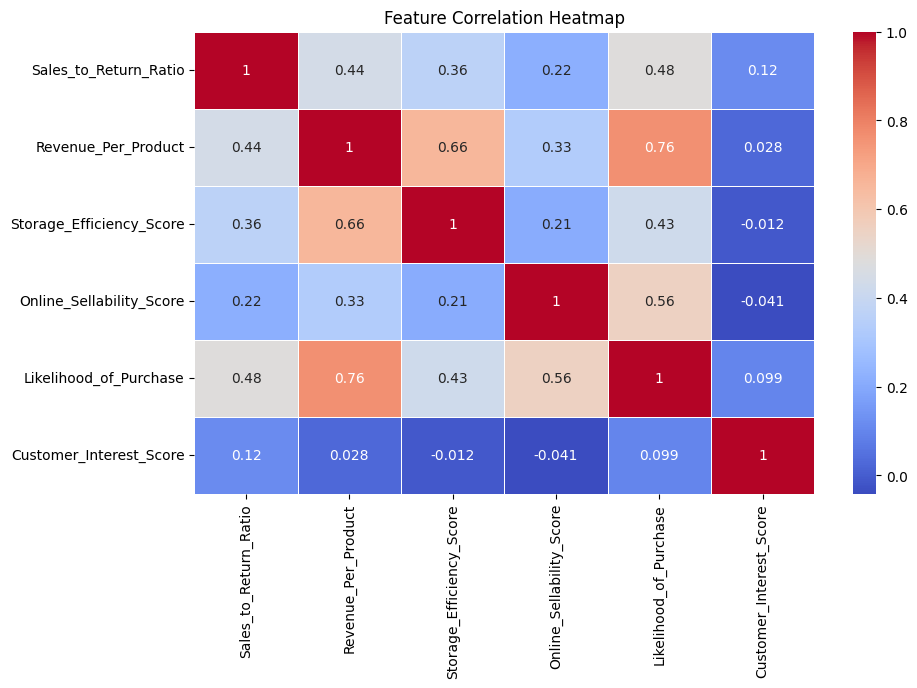

In [64]:
# Feature Correlation Heatmap 

plt.figure(figsize=(10, 6)) 

sns.heatmap(product_catalog_df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5) 

plt.title("Feature Correlation Heatmap") 

plt.show() 

 

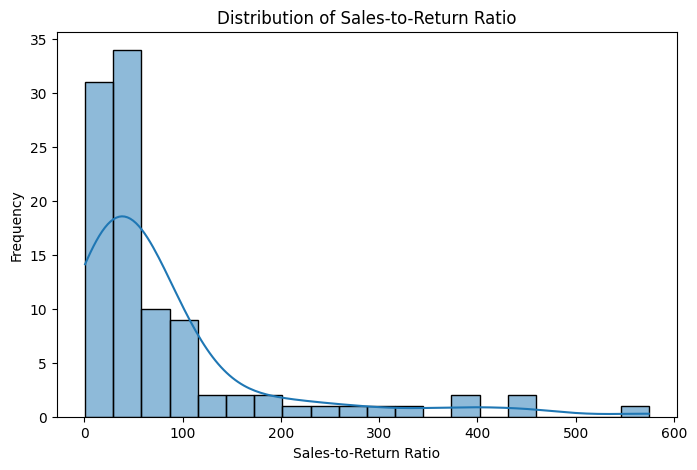

In [65]:
# Histogram 

plt.figure(figsize=(8, 5)) 

sns.histplot(product_catalog_df["Sales_to_Return_Ratio"], bins=20, kde=True) 

plt.title("Distribution of Sales-to-Return Ratio") 

plt.xlabel("Sales-to-Return Ratio") 

plt.ylabel("Frequency") 

plt.show() 

 

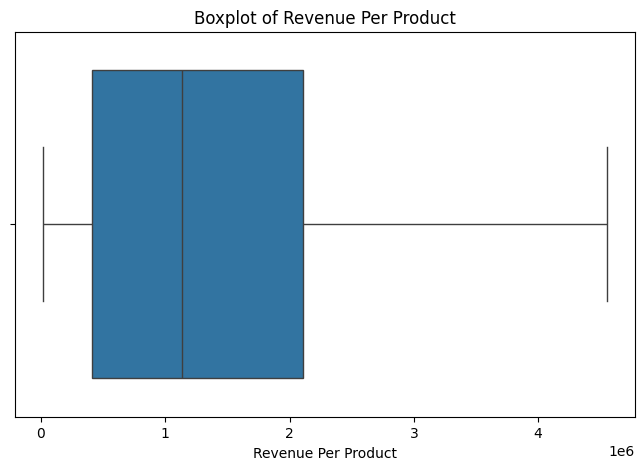

In [66]:
# Box Plot 

plt.figure(figsize=(8, 5)) 

sns.boxplot(x=product_catalog_df["Revenue_Per_Product"]) 

plt.title("Boxplot of Revenue Per Product") 

plt.xlabel("Revenue Per Product") 

plt.show() 

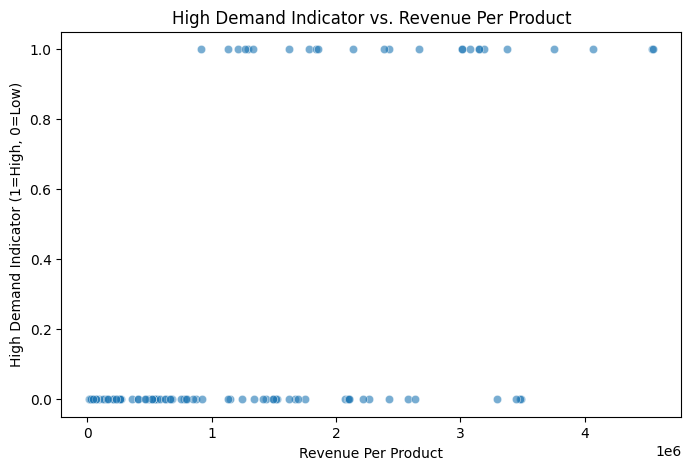

In [67]:
# Scatter Plot 

plt.figure(figsize=(8, 5)) 

sns.scatterplot(x=product_catalog_df["Revenue_Per_Product"], y=product_catalog_df["High_Demand_Indicator"], alpha=0.6) 

plt.title("High Demand Indicator vs. Revenue Per Product") 

plt.xlabel("Revenue Per Product") 

plt.ylabel("High Demand Indicator (1=High, 0=Low)") 

plt.show() 

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_29528\4121275398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm")


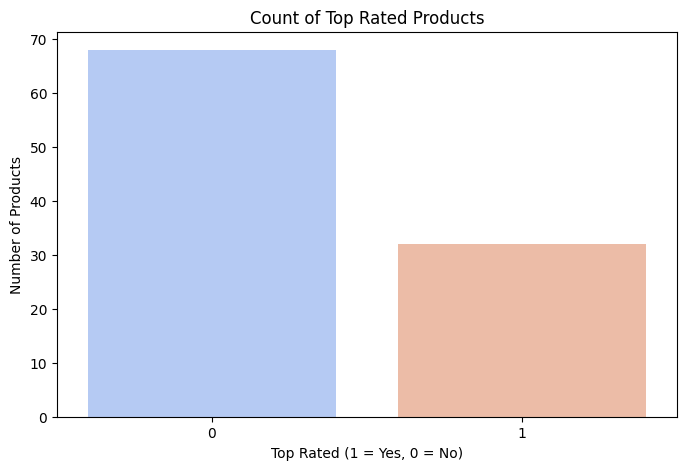

In [68]:
# Bar chart for top-rated products 

plt.figure(figsize=(8, 5)) 

sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm") 

plt.title("Count of Top Rated Products") 

plt.xlabel("Top Rated (1 = Yes, 0 = No)") 

plt.ylabel("Number of Products") 

plt.show() 